In [6]:
import pymongo #資料庫
import pandas as pd 

In [8]:
#建置df
#連結mongodb
#第一步取得單一股票回測

client = pymongo.MongoClient('mongodb://localhost:27017')
#連接資料庫
db = client['stock_data']    #資料庫
col_price = db["stock_price"]#價量資料
probability=[]
# stock_num=input("")

stock_data_p=col_price.find({"number":"8027"})#查詢資料庫
stock_p =  pd.DataFrame(list(stock_data_p))#轉成dataframe格式
try:
    stock_p=stock_p.sort_values(by=['date'],ascending=True)#排序日期
    stock_p.index =pd.DatetimeIndex(stock_p['date'])
    stock_p=stock_p.drop(['_id'],axis=1)
    # stock_p = stock_p.loc["2020-01-02":"2020-05-1"]

    stock_p["toclose_1"]=stock_p["close"].shift(1)
    stock_p["toclose_2"]=stock_p["close"].shift(2)
    stock_p["toclose_3"]=stock_p["close"].shift(3)
    stock_p["toclose_"]=stock_p["close"].shift(-1)
    stock_p["ma_5"] = stock_p["volume"].rolling(5).mean()
except:
    pass
stock_p.dropna(axis=0, how='any', inplace=True)
all_stock_roi=stock_p
all_stock_roi

,number,date,open,high,low,close,volume,toclose_1,toclose_2,toclose_3,toclose_,ma_5
date,,,,,,,,,,,,
2020-01-08,8027,2020/01/08,33.00,33.00,32.55,32.70,126.0,33.05,33.80,32.00,32.15,237.6
2020-01-09,8027,2020/01/09,32.90,32.90,32.10,32.15,130.0,32.70,33.05,33.80,32.70,203.8
2020-01-10,8027,2020/01/10,32.45,32.70,32.15,32.70,95.0,32.15,32.70,33.05,31.85,186.2
2020-01-13,8027,2020/01/13,33.35,33.35,31.70,31.85,248.0,32.70,32.15,32.70,31.90,163.6
2020-01-14,8027,2020/01/14,32.00,32.40,31.65,31.90,126.0,31.85,32.70,32.15,32.25,145.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-20,8027,2022/05/20,76.90,77.30,76.00,76.20,760.0,77.00,75.90,75.90,76.40,1029.0
2022-05-23,8027,2022/05/23,76.30,77.30,75.80,76.40,575.0,76.20,77.00,75.90,74.40,994.8
2022-05-24,8027,2022/05/24,76.80,77.30,74.40,74.40,743.0,76.40,76.20,77.00,78.40,932.8


In [9]:
#控制策略連續三日上漲
for i in range(len(all_stock_roi)):    
    if all_stock_roi["close"][i]>all_stock_roi["toclose_1"][i] and all_stock_roi["toclose_1"][i]>all_stock_roi["toclose_2"][i] and all_stock_roi["toclose_2"][i]>all_stock_roi["toclose_3"][i] and all_stock_roi["ma_5"][i]*2<all_stock_roi["volume"][i]:
        probability.append(1)
    else:
        probability.append(0)
all_stock_roi["probability"]=probability

In [10]:
#觸發次數
buy1 = all_stock_roi.loc[all_stock_roi["probability"].isin([1])]
buy1

,number,date,open,high,low,close,volume,toclose_1,toclose_2,toclose_3,toclose_,ma_5,probability
date,,,,,,,,,,,,,
2020-06-03,8027,2020/06/03,34.45,37.4,34.0,37.4,2421.0,34.0,33.9,33.1,41.0,619.6,1
2020-06-04,8027,2020/06/04,38.60,41.0,37.6,41.0,3412.0,37.4,34.0,33.9,41.9,1266.4,1
2020-09-04,8027,2020/09/04,66.90,74.1,65.0,74.1,15918.0,67.4,61.3,57.9,70.0,6146.2,1
2020-12-08,8027,2020/12/08,91.00,93.7,88.5,92.5,11643.0,89.8,81.7,78.1,96.2,5811.2,1
2020-12-25,8027,2020/12/25,91.60,97.0,91.6,96.8,2763.0,91.1,90.9,88.3,96.4,1349.4,1
2021-03-15,8027,2021/03/15,89.90,93.9,88.9,93.5,4460.0,88.6,85.6,83.8,90.8,1759.8,1
2021-11-18,8027,2021/11/18,66.10,69.9,66.1,68.7,1615.0,65.5,64.1,63.4,68.7,536.4,1
2021-12-03,8027,2021/12/03,74.90,75.5,72.6,73.0,2633.0,70.8,68.2,67.6,72.6,1046.6,1
2021-12-29,8027,2021/12/29,79.30,85.5,78.9,85.2,8296.0,77.8,77.7,76.9,85.0,2707.6,1


In [11]:
#計算報酬率
return_rate = []
for i in range(len(buy1)):
    rate = round((((buy1["toclose_"][i]-buy1["toclose_"][i]*0.001425)-buy1["toclose_"][i]*0.003) - (buy1["close"][i]+buy1["close"][i]*0.001425)) / (buy1["close"][i]+buy1["close"][i]*0.001425) * 100,2)
    return_rate.append(rate)
return_rate

[8.99, 1.6, -6.08, 3.39, -0.99, -3.45, -0.58, -1.13, -0.82, -2.33]

In [12]:
return_all = sorted(return_rate,reverse=True)
print("該策略最高報酬為 : " + str(return_all[0]) + " %")
print("該策略最低報酬為 : " + str(return_all[-1]) + " %")

該策略最高報酬為 : 8.99 %
該策略最低報酬為 : -6.08 %


In [13]:
#計算勝率
win = len([i for i in return_rate if i > 0])
lose = len([i for i in return_rate if i <= 0])
sum_t = len(return_rate)
print("總獲利次數 : " + str(win) + "次")
print("總虧損次數 : " + str(lose) + "次")
print("總交易次數 : " + str(win + lose) + "次")
print("勝率為 : " + str(round(win / sum_t*100,2)) + "%")

總獲利次數 : 3次
總虧損次數 : 7次
總交易次數 : 10次
勝率為 : 30.0%


In [14]:
#報酬率
cum_return = [0]
for i in range(len(return_rate)):
    cum = round(return_rate[i] + cum_return[i],2)
    cum_return.append(cum)
print("該策略總報酬為 :" + str(cum_return[-1]) + "%")
print("該策略平均每次報酬為 : " + str(round(cum_return[-1]/(win + lose),2)) + "%")

該策略總報酬為 :-1.4%
該策略平均每次報酬為 : -0.14%


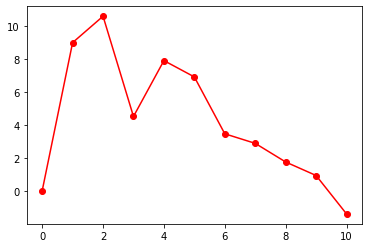

In [15]:
import matplotlib.pyplot as plt #繪製圖表 
#累計報酬率可視化
plt.plot(cum_return,"ro-")
plt.show()